<a href="https://colab.research.google.com/github/RM-RAMASAMY/Clustering-Algorithms/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering
> A Summary of lecture "Cluster Analysis in Python", via datacamp

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: images/fifa_cluster.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basics of hierarchical clustering
- Creating a distance matrix using linkage
    - ```method```: how to calculate the proximity of clusters
    - ```metric```: distance metric
    - ```optimal_ordering```: order data points
- Type of Methods
    - single: based on two closest objects
    - complete: based on two farthest objects
    - average: based on the arithmetic mean of all objects
    - centroids: based on the geometric mean of all objects
    - median: based on the median of all objects
    - ward: based on the sum of squares
    

### Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

- Preprocess

In [8]:
comic_con = pd.read_csv('comic_con.csv')
comic_con.columns

Index(['x_coordinate', 'y_coordinate', 'x_scaled', 'y_scaled'], dtype='object')

In [9]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

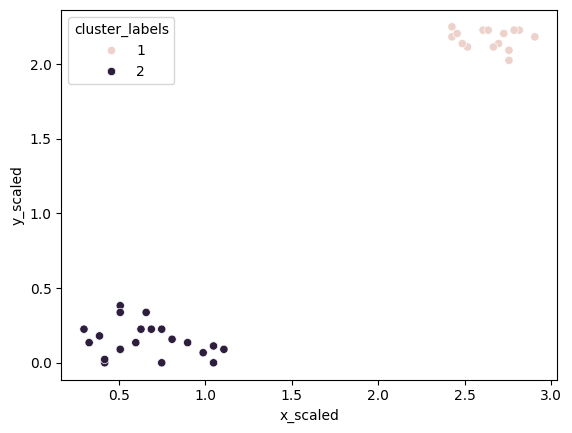

In [10]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

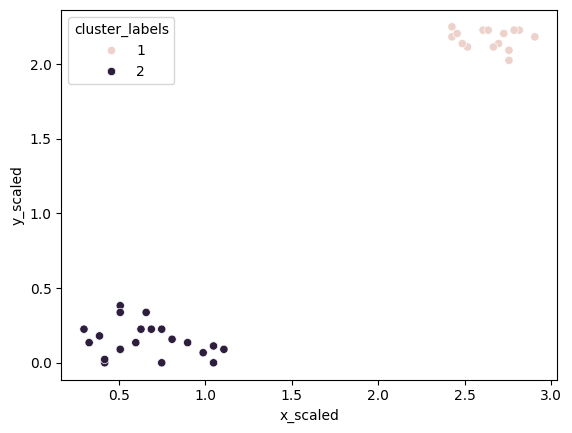

In [11]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.



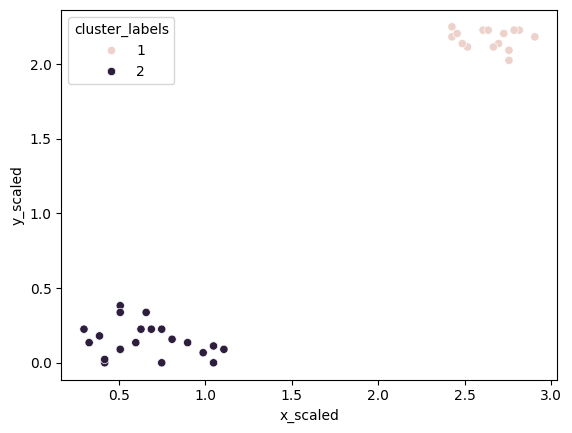

In [12]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

## Visualize clusters
- Why visualize clusters?
    - Try to make sense of the clusters formed
    - An additional step in validation of clusters
    - Spot trends in data

### Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

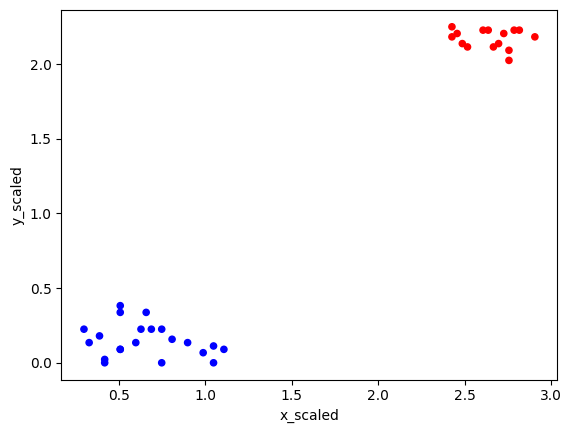

In [13]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]));

### Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild ```hue``` function for cluster labels.

<Axes: xlabel='x_scaled', ylabel='y_scaled'>

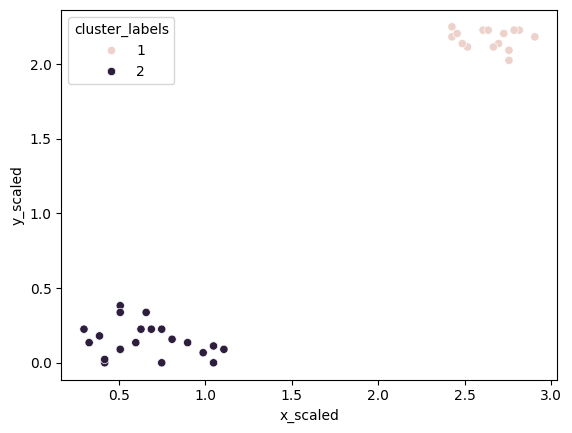

In [14]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

## How many clusters?
- Introduction to dendrograms
    - Strategy till now - decide clusters on visual inspection
    - Dendrograms help in showing progressions as clusters are merged
    - A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

### Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.



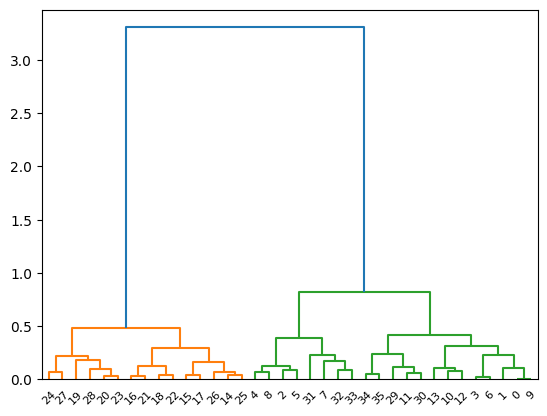

In [15]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

### Limitations of hierarchical clustering
- Comparison of runtime of linkage method
    - Increasing runtime with data points
    - Quadratic increase of runtime
    - Not feasible for large datasets

### Timing run of hierarchical clustering
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:
```python
%timeit sum([1, 3, 2])
```

In [16]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

680 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

- Preprocess

In [18]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [19]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


<Axes: xlabel='scaled_sliding_tackle', ylabel='scaled_aggression'>

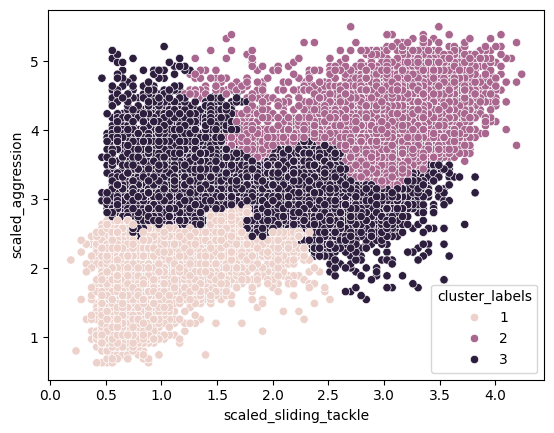

In [21]:
# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)